In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [44]:
housing_data = pd.read_excel('AmesHousing.xls')
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [45]:
housing_data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [46]:
housing_data.drop(columns=['Order', 'PID'], inplace=True)

In [47]:
housing_data.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [48]:
import warnings
warnings.filterwarnings("ignore")
housing_continuous = housing_data.select_dtypes (include = ['int64','float64'])
#housing_continuous.drop(columns = ['MS SubClass','Year Built','Year Remod/Add','Mo Sold','Yr Sold'],inplace = True)
housing_continuous.drop(columns = ['MS SubClass','Mo Sold'],inplace = True)
#choosing continuous columns based on d-type but dropping some of them based on looking at the description
#Continuing to keep year related columns as continuous to reduce dimensionality

In [49]:
housing_continuous.shape

(2930, 35)

In [50]:
cont_name = list(housing_continuous)

In [51]:
cat_name = list(set(housing_data.columns)- set(housing_continuous.columns))

In [52]:
len(cat_name)

45

In [53]:
cat_name

['Central Air',
 'Bsmt Qual',
 'Paved Drive',
 'Garage Qual',
 'Bsmt Cond',
 'Garage Type',
 'Land Contour',
 'Street',
 'House Style',
 'Heating QC',
 'Fence',
 'Heating',
 'Mo Sold',
 'Roof Matl',
 'Condition 1',
 'Exter Cond',
 'Neighborhood',
 'Alley',
 'Mas Vnr Type',
 'MS Zoning',
 'Lot Config',
 'Misc Feature',
 'Exterior 1st',
 'BsmtFin Type 1',
 'Exterior 2nd',
 'Garage Cond',
 'Utilities',
 'Functional',
 'Roof Style',
 'Exter Qual',
 'Sale Type',
 'Fireplace Qu',
 'Sale Condition',
 'Garage Finish',
 'Condition 2',
 'Electrical',
 'Pool QC',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'Bldg Type',
 'Foundation',
 'Lot Shape',
 'MS SubClass',
 'Kitchen Qual',
 'Land Slope']

In [54]:
#housing_categorical = housing_data.select_dtypes (include = ['object'])
#housing_categorical['MS SubClass'] = housing_data['MS SubClass']

# 1.1 

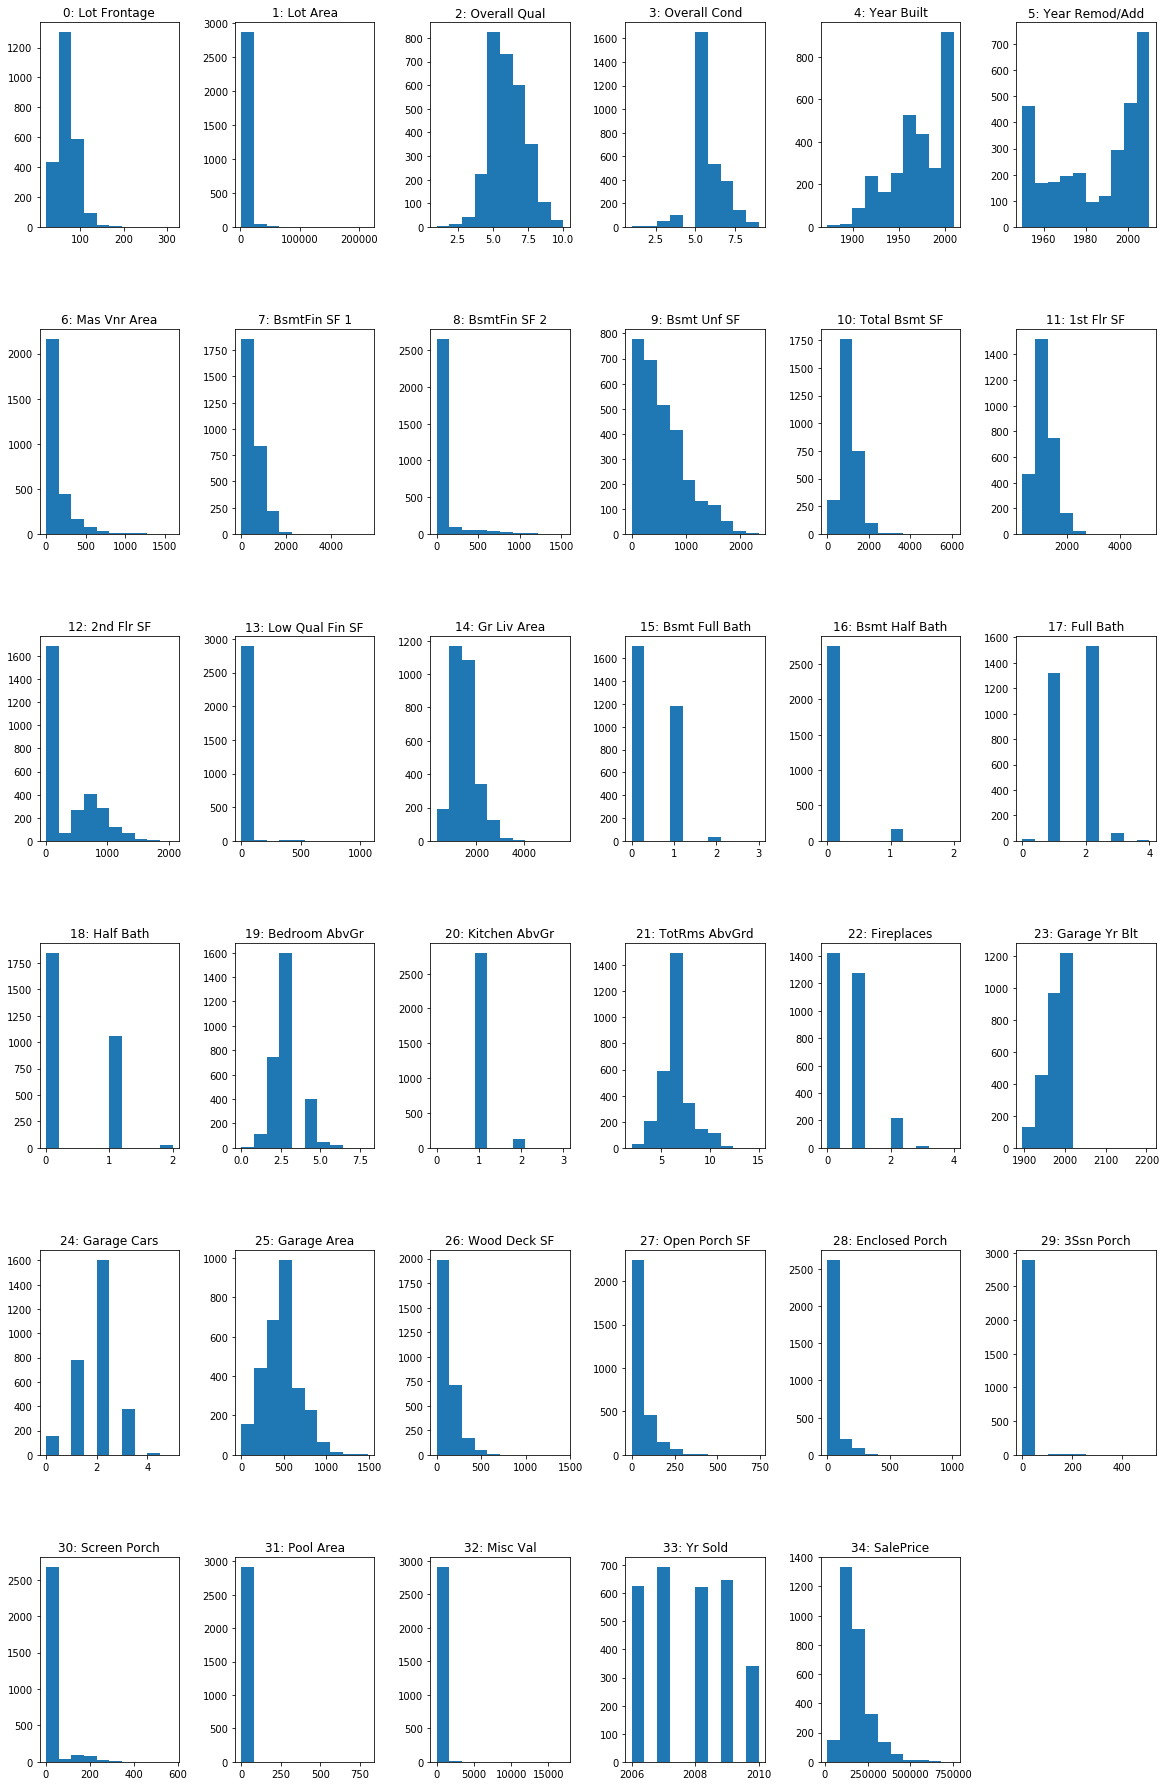

In [55]:
fig, axes = plt.subplots (6,6,figsize = (20,32))
plt.subplots_adjust(wspace=0.40,hspace=0.50)

for i, ax in enumerate (axes.ravel()):
    if i > 34:
        ax.set_visible(False)
        continue
    ax.hist(housing_continuous.iloc[:,i])
    ax.set_title("{}: {}".format(i, cont_name[i]))


* We can see that all variables are not continuous - some of the histogram distribution have a lot of spaces in between them indicating that they are discrete (ex: Full bath, Garage Cars etc.)

*A handful variables seem to have outliers and that is why we see that the prominent histograms are either to the left/ right along with a few smaller ones distributed across (ex:BsmtFin SF 2 etc.)

# 1.2

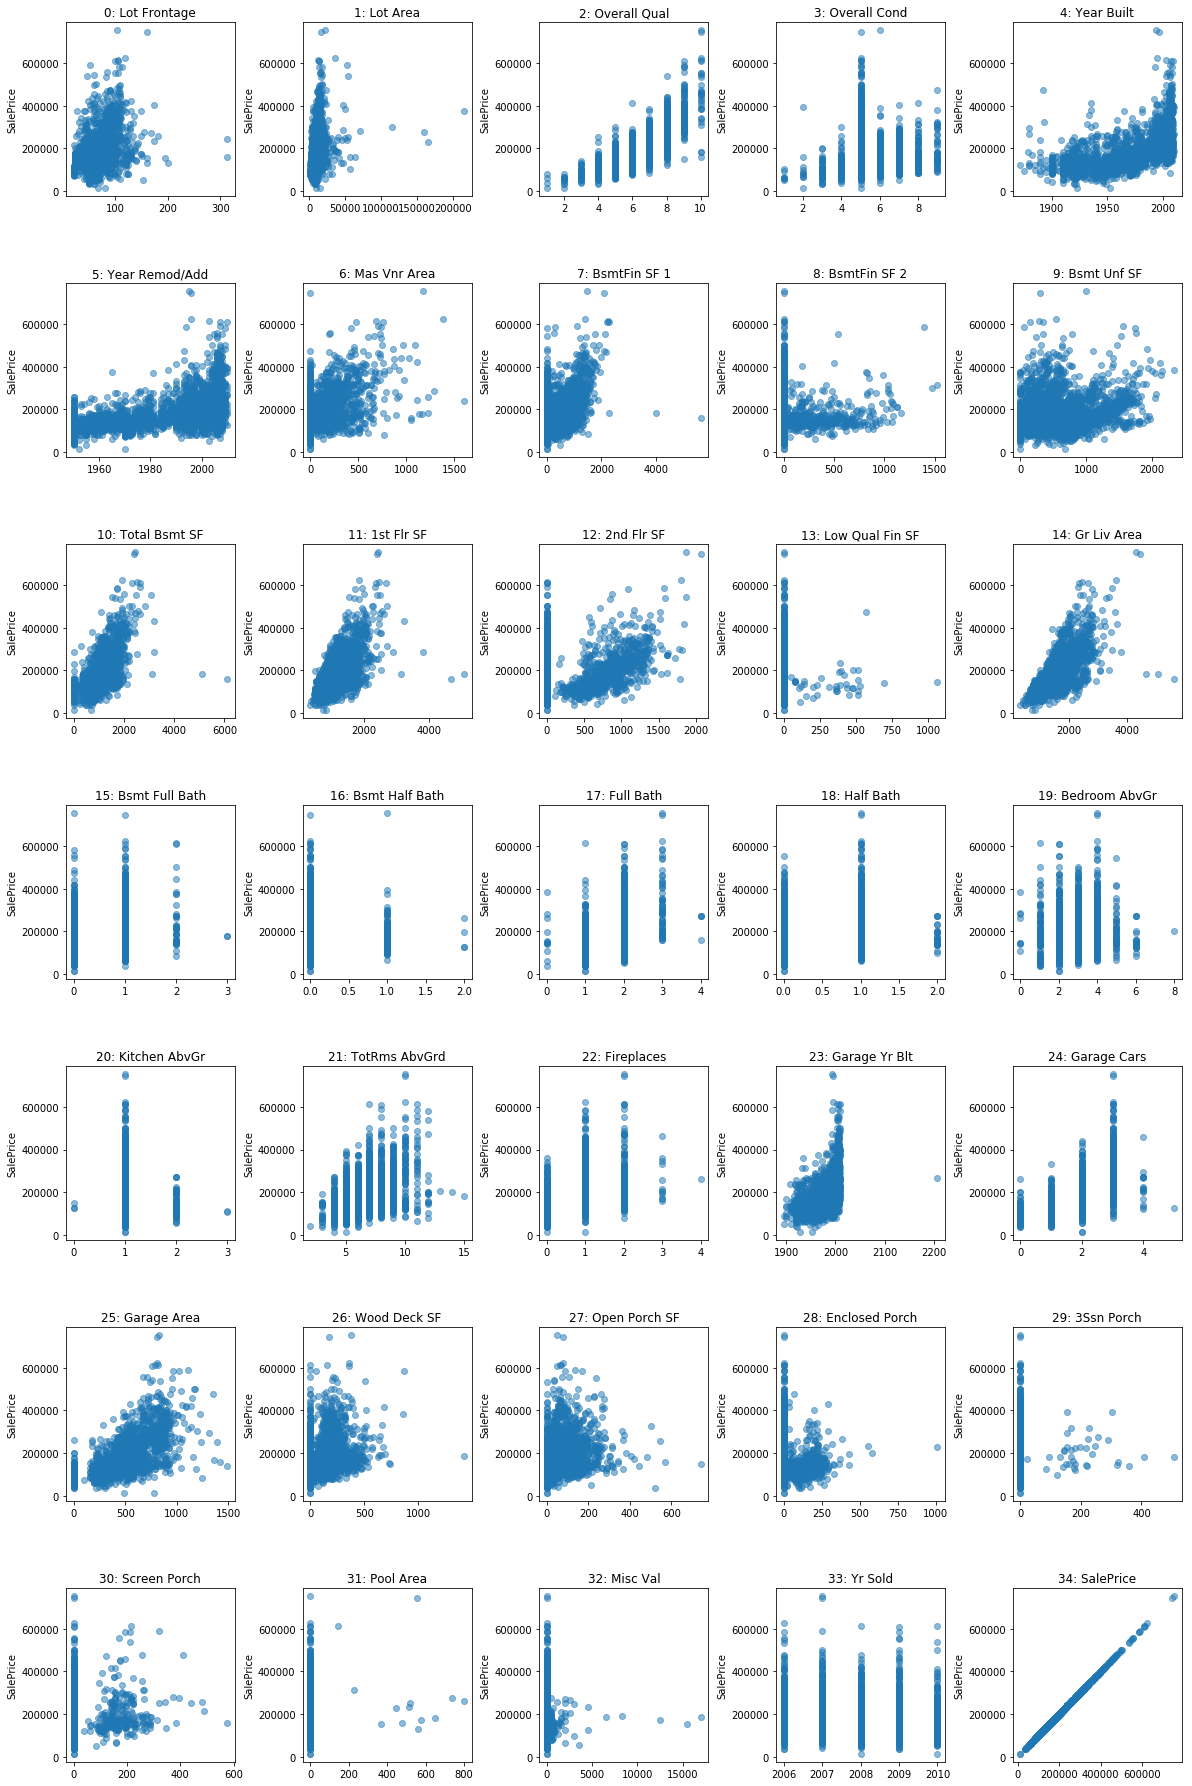

In [56]:
fig, axes = plt.subplots(7, 5, figsize=(20, 32))
plt.subplots_adjust(wspace=0.40,hspace=0.50)

for i, ax in enumerate(axes.ravel()):
    if i > 34:
        ax.set_visible(False)
        continue
    ax.plot(housing_continuous.iloc[:, i], housing_continuous['SalePrice'], 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, cont_name[i]))
    ax.set_ylabel("SalePrice")


In [57]:
housing_data[cat_name] = housing_data[cat_name].replace({np.nan:'NA'})
#Taking nan values as NA, a separate category

# 1.3

In [58]:
from sklearn.model_selection import train_test_split
cont_name.remove('SalePrice')
X_train, X_test, y_train, y_test = train_test_split (housing_data.loc[:, housing_data.columns != 'SalePrice'],housing_data['SalePrice'], random_state = 0)
X_train = pd.concat((X_train[cat_name], X_train[cont_name]), axis=1)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cat_score = []

for i in cat_name:
    scores = cross_val_score(LinearRegression(), pd.get_dummies(X_train[i]), y_train, cv=5)
    cat_score.append(np.mean(scores))
    
print ('The top 5 R^2 values are')

for i in range(0,5):
    
    print(cat_name[np.argsort(cat_score)[-5:][i]], cat_score[np.argsort(cat_score)[-5:][i]])

The top 5 R^2 values are
Garage Type 0.23464024676523776
Foundation 0.27072441117959734
Garage Finish 0.30005099379138944
Fireplace Qu 0.31984124628027705
Exter Qual 0.5219081154566937


Text(0.5, 1.0, 'Exter Qual and Sale Price')

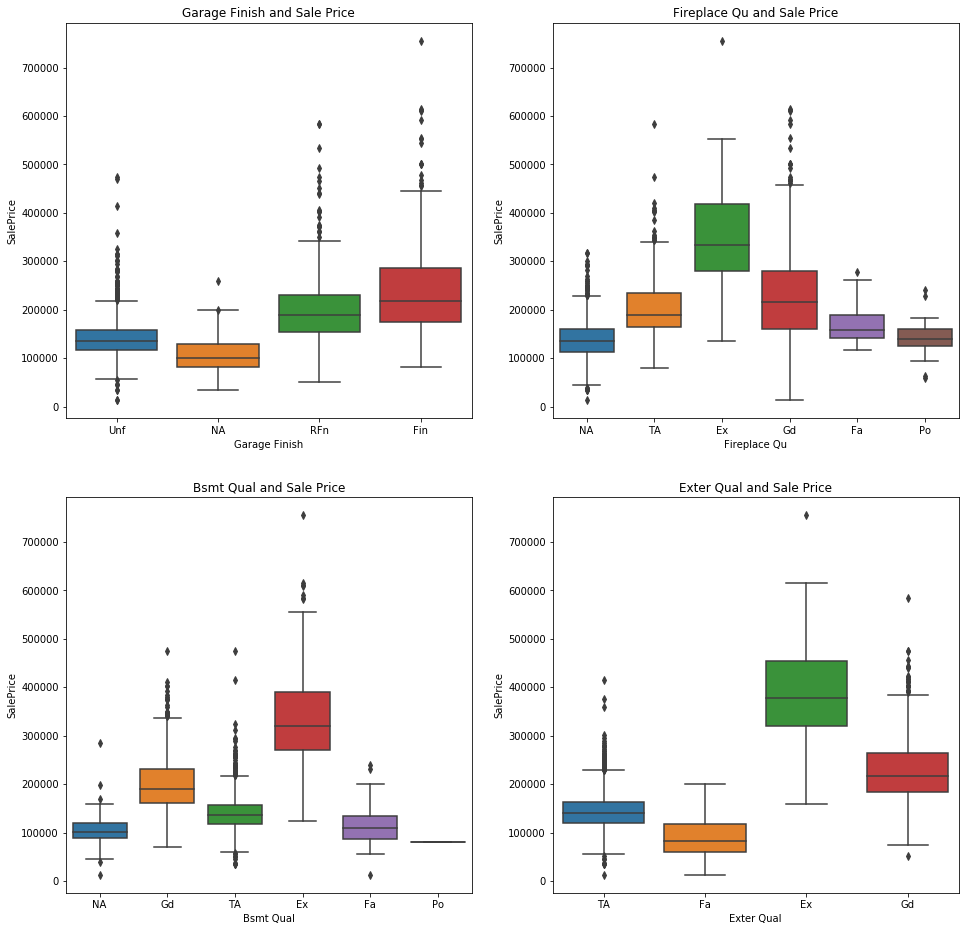

In [60]:
#Plotting the top 4 values from the previous section
import seaborn as sns
train_set = pd.concat([X_train, y_train], axis=1)
fig, ax = plt.subplots(2,2, figsize=(16,16))

_ = sns.boxplot(x='Garage Finish', y='SalePrice',data= train_set, ax=ax[0][0])
ax[0,0].set_title('Garage Finish and Sale Price')

_ = sns.boxplot(x='Fireplace Qu', y='SalePrice',data= train_set, ax=ax[0][1])
ax[0,1].set_title('Fireplace Qu and Sale Price')

_ = sns.boxplot(x='Bsmt Qual', y='SalePrice',data= train_set, ax=ax[1][0])
ax[1,0].set_title('Bsmt Qual and Sale Price')

_ = sns.boxplot(x='Exter Qual', y='SalePrice',data= train_set, ax=ax[1][1])
ax[1,1].set_title('Exter Qual and Sale Price')


In [61]:
X_train

,Central Air,Bsmt Qual,Paved Drive,Garage Qual,Bsmt Cond,Garage Type,Land Contour,Street,House Style,Heating QC,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold
896,N,NA,N,TA,NA,Detchd,Lvl,Pave,1.5Fin,TA,...,1.0,240.0,92,0,185,0,0,0,0,2009
1901,N,NA,N,NA,NA,NA,Low,Pave,1Story,Fa,...,0.0,0.0,0,0,0,0,0,0,0,2007
390,Y,Gd,Y,TA,TA,Attchd,Lvl,Pave,1Story,TA,...,2.0,478.0,0,0,0,0,0,0,0,2009
1293,Y,TA,Y,TA,TA,Detchd,Lvl,Pave,1.5Fin,Gd,...,2.0,440.0,187,0,0,0,0,0,0,2008
1767,Y,Ex,Y,TA,TA,Attchd,Lvl,Pave,2Story,Ex,...,3.0,832.0,382,50,0,0,0,0,0,2007
251,Y,Gd,Y,TA,TA,Attchd,Lvl,Pave,1Story,Ex,...,3.0,740.0,0,36,0,0,0,0,0,2010
2847,Y,Fa,Y,Fa,TA,Detchd,Lvl,Pave,1.5Fin,TA,...,1.0,240.0,0,0,0,0,0,0,0,2006
357,Y,Gd,Y,TA,Gd,BuiltIn,Lvl,Pave,2Story,Gd,...,2.0,420.0,232,63,0,0,0,0,480,2009
1396,Y,TA,N,TA,TA,2Types,Lvl,Pave,1.5Fin,Gd,...,3.0,627.0,0,0,0,0,0,0,0,2008
852,Y,Gd,Y,NA,TA,NA,HLS,Pave,1Story,TA,...,0.0,0.0,0,0,0,0,0,0,0,2009


# 1.4

In [62]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

preprocess_imputer = ColumnTransformer([('ContImpute', SimpleImputer(strategy='median'), cont_name), 
    ('Ohe', OneHotEncoder(handle_unknown='ignore'), cat_name)], remainder='passthrough')

In [63]:
import warnings
warnings.filterwarnings("ignore")

linreg_model = make_pipeline(preprocess_imputer, LinearRegression())
linreg_scores = cross_val_score(linreg_model, X_train, y_train, cv=5)

lasso_model = make_pipeline (preprocess_imputer, Lasso())
lasso_scores = cross_val_score (lasso_model, X_train, y_train, cv=5)

ridge_model = make_pipeline (preprocess_imputer, Ridge())
ridge_scores = cross_val_score (ridge_model, X_train, y_train, cv=5)

elastic_model = make_pipeline(preprocess_imputer, ElasticNet())
elastic_scores = cross_val_score(elastic_model, X_train, y_train, cv=5)


print('Linear Regression Initial Score ', np.mean(linreg_scores))
print ('Lasso Regression Initial Score ', np.mean(lasso_scores))
print ('Ridge Regression Initial Score ', np.mean(ridge_scores))
print('Elastic Net Initial Score ', np.mean(elastic_scores))


Linear Regression Initial Score  0.8410318378923524
Lasso Regression Initial Score  0.8735966862603408
Ridge Regression Initial Score  0.6964829199408656
Elastic Net Initial Score  0.8437582497513526


In [64]:
from sklearn.preprocessing import StandardScaler

scaling = ColumnTransformer([('scaling', StandardScaler(), cont_name)], remainder='passthrough')

preprocess_scaling = ColumnTransformer([('ContImpute', SimpleImputer(strategy='median'), np.arange(0,len(cont_name))), 
    ('Ohe', OneHotEncoder(handle_unknown='ignore'), np.arange(len(cont_name),len(X_train.columns)))], remainder='passthrough')

In [65]:
linreg_model_scaling = make_pipeline(scaling, preprocess_scaling, LinearRegression())
linreg_scores_scaling = cross_val_score(linreg_model_scaling, X_train, y_train, cv=5)

lasso_model_scaling = make_pipeline (scaling, preprocess_scaling, Lasso())
lasso_scores_scaling = cross_val_score (lasso_model_scaling, X_train, y_train, cv=5)

ridge_model_scaling = make_pipeline (scaling, preprocess_scaling, Ridge())
ridge_scores_scaling = cross_val_score (ridge_model_scaling, X_train, y_train, cv=5)

elastic_model_scaling = make_pipeline(preprocess_imputer, ElasticNet())
elastic_scores_scaling = cross_val_score(elastic_model, X_train, y_train, cv=5)

print('Linear Regression (Scaling) ', np.mean(linreg_scores_scaling))
print ('Lasso Regression (Scaling) ', np.mean(lasso_scores_scaling))
print ('Ridge Regression (Scaling) ', np.mean(ridge_scores_scaling))
print('Elastic Net (Scaling) ', np.mean(elastic_scores_scaling))

Linear Regression (Scaling)  0.8348515787662137
Lasso Regression (Scaling)  0.8736450936390707
Ridge Regression (Scaling)  0.8707794944172409
Elastic Net (Scaling)  0.8437582497513526


#Scaling definitely helps in the case of ridge regression as we see the score move from 0.68 to 0.86 on scaling. The impact is visible but not huge for the other models but it might be due to the fact that they show a ~85% score which is high initially itself.

# 1.5

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [67]:
#paragrid_linreg = {'linreg__fit_intercept':[True,False], 'linreg__normalize':[True,False], 'linreg__copy_X':[True, False]}
paragrid_lasso = {'lasso__alpha': np.logspace(-5, 3, 20)}
paragrid_ridge = {'ridge__alpha': np.logspace(-3, 3, 13)}
paragrid_elastic = {'elastic__alpha': np.logspace(-3, 3, 13), 'elastic__l1_ratio':[0.01, .1, .4, .7, .9, 0.95, 1]}


#pipeline_linreg = Pipeline(steps=[('scaling',scaling), ('preprocess', preprocess_scaling), ('linreg', LinearRegression())])
pipeline_lasso = Pipeline(steps=[('scaling',scaling), ('preprocess', preprocess_scaling), ('lasso', Lasso())])
pipeline_ridge = Pipeline(steps=[('scaling',scaling), ('preprocess', preprocess_scaling), ('ridge', Ridge())])
pipeline_elastic = Pipeline(steps=[('scaling',scaling), ('preprocess', preprocess_scaling), ('elastic', ElasticNet())])


#gcv_linreg = GridSearchCV(pipeline_linreg, param_grid=paragrid_linreg, cv=5, return_train_score=True)
#gcv_linreg.fit(X_train, y_train)

gcv_lasso = GridSearchCV(pipeline_lasso, param_grid= paragrid_lasso, cv=5, return_train_score=True)
gcv_lasso.fit(X_train, y_train)

gcv_ridge = GridSearchCV(pipeline_ridge, param_grid=paragrid_ridge, cv=5, return_train_score=True)
gcv_ridge.fit(X_train, y_train)

gcv_elastic = GridSearchCV(pipeline_elastic, param_grid=paragrid_elastic, cv=5, return_train_score=True)
gcv_elastic.fit(X_train, y_train)

#print("Linear regression best parameter is".format(gcv_linreg.best_params_))
print("Lasso best parameter is {}".format(gcv_lasso.best_params_))
print("Ridge best parameters is {}".format(gcv_ridge.best_params_))
print("Elastic Net best parameters is {}".format(gcv_elastic.best_params_))

#These values change on running through this multiple times, probably due to seed issues.
#I had these at 141, 53, <50, and 0.9) one day before submission

KeyboardInterrupt: 

In [ ]:
#Visualising the performance of Lasso and Ridge

fig, ax = plt.subplots(1,2, figsize=(20,10))

lasso_res = pd.DataFrame(gcv_lasso.cv_results_)
ridge_res = pd.DataFrame (gcv_ridge.cv_results_)

ax[0].plot(lasso_res['param_lasso__alpha'], lasso_res['mean_train_score'], label = 'Mean Train Score')
ax[0].plot(lasso_res['param_lasso__alpha'], lasso_res['mean_test_score'], label = 'Mean Validation Score')

ax[1].plot(ridge_res['param_ridge__alpha'], ridge_res['mean_train_score'], label = 'Mean Train Score')
ax[1].plot(ridge_res['param_ridge__alpha'], ridge_res['mean_test_score'], label = 'Mean Validation Score')

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('alpha - Lasso')
ax[0].set_ylabel('Mean Scores')

ax[1].set_xlabel('alpha - Ridge')
ax[1].set_ylabel('Mean Scores')


In [ ]:
#Visualising the performance of ElasticNet
import seaborn as sns

res = pd.pivot_table(pd.DataFrame(gcv_elastic.cv_results_), values = 'mean_test_score',index = 'param_elastic__alpha', 
                     columns = 'param_elastic__l1_ratio')

res = res.set_index(res.index.values.round(3))
ax = sns.heatmap(res, annot = True)
plt.title('Elastic Net Grid Search')
plt.ylabel ('param_elastic__alpha')

# 1.6

In [ ]:
#Checking number of co-efficient after Lasso
len (gcv_lasso.best_estimator_.named_steps['lasso'].coef_)
#Checking number of co-efficients after onehotencoding
#len(cont_name) = 34
x = scaling.fit_transform(X_train)
categorical_ohe_lasso = preprocess_scaling.fit(x).named_transformers_['Ohe'].get_feature_names()
len(preprocess_scaling.fit(x).named_transformers_['Ohe'].get_feature_names())
#verifying that lengths are the same

In [ ]:
len(np.append (cont_name, preprocess_scaling.fit(x).named_transformers_['Ohe'].get_feature_names()))
#verifying that lengths are the same

In [ ]:
lasso_features = pd.DataFrame(gcv_lasso.best_estimator_.named_steps['lasso'].coef_,np.append (cont_name, preprocess_scaling.fit(x).named_transformers_['Ohe'].get_feature_names())).reset_index() 
lasso_features.columns = ['lasso_feature','lasso_feature_value']
lasso_features['lasso_feature_value'] = lasso_features['lasso_feature_value'].abs()
lasso_features.sort_values(by=['lasso_feature_value'], ascending = False, inplace = True)
lasso_features.head()

In [ ]:
ridge_features = pd.DataFrame(gcv_ridge.best_estimator_.named_steps['ridge'].coef_,np.append (cont_name, preprocess_scaling.fit(x).named_transformers_['Ohe'].get_feature_names())).reset_index() 
ridge_features.columns = ['ridge_feature','ridge_feature_value']
ridge_features['ridge_feature_value'] = ridge_features['ridge_feature_value'].abs()
ridge_features.sort_values(by=['ridge_feature_value'], ascending = False, inplace = True)

In [ ]:
elastic_features = pd.DataFrame(gcv_elastic.best_estimator_.named_steps['elastic'].coef_,np.append (cont_name, preprocess_scaling.fit(x).named_transformers_['Ohe'].get_feature_names())).reset_index() 
elastic_features.columns = ['elastic_feature','elastic_feature_value']
elastic_features['elastic_feature_value'] = elastic_features['elastic_feature_value'].abs()
elastic_features.sort_values(by=['elastic_feature_value'], ascending = False, inplace = True)

In [ ]:
lasso_features['lasso_feature'][:15]

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,30))
plt.subplots_adjust(wspace=0.02,hspace=0.60)

ax[0].bar(lasso_features['lasso_feature'][:15],lasso_features['lasso_feature_value'][:15])
ax[0].set_xticklabels(lasso_features['lasso_feature'][:15], rotation=45)
ax[0].set_title('Lasso Important Features')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Feature_Value')

ax[1].bar(ridge_features['ridge_feature'][:15],ridge_features['ridge_feature_value'][:15])
ax[1].set_xticklabels(ridge_features['ridge_feature'][:15], rotation=45)
ax[1].set_title('Ridge Important Features')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Feature_Value')

ax[2].bar(elastic_features['elastic_feature'][:15],elastic_features['elastic_feature_value'][:15])
ax[2].set_xticklabels(elastic_features['elastic_feature'][:15], rotation=45)
ax[2].set_title('ElasticNet Important Features')
ax[2].set_xlabel('Feature')
ax[2].set_ylabel('Feature_Value')


In [ ]:
a = list (lasso_features['lasso_feature'][:15])
b= list (ridge_features['ridge_feature'][:15])
c= list (elastic_features['elastic_feature'][:15])

set(a).intersection(b, c)

On running this before submission, 10 out of 15 features are common across these models - from looking at variables, we can further find that certain categorical variables repeat (one-hot encoded forms)